In [94]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import random

In [102]:
train_x = np.load('train_images.npy', encoding='latin1')
train_x = np.array([arr[1] for arr in train_x], np.uint8)
train_y_list = np.array(pd.read_csv('train_labels.csv', usecols=['Category']))

In [140]:
def clean_noise():
    idx = random.randint(0, 10000-1)
    # idx = 5215
    print(train_y_list[idx])
    img = np.uint8(train_x[idx].reshape(100, 100))
    gray = cv2.resize(img, (100, 100))
    img = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)[1]
    retval, labels = cv2.connectedComponents(img)
    
    num = labels.max()
    N = 28
    for i in range(1, num+1):
        pts = np.where(labels == i)
        if len(pts[0]) < N:
            labels[pts] = 0
    
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255 * np.ones_like(label_hue)
    labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
    labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
    labeled_img[labeled_img == 0] = 0
    
    plt.imshow(labeled_img)
    print(idx)
    return idx

['penguin']
4322


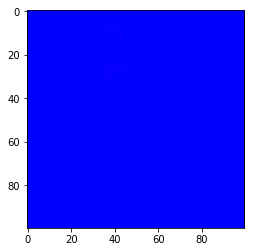

In [141]:
idx = clean_noise()

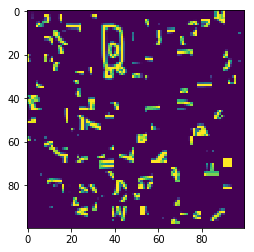

In [142]:
plt.imshow(train_x[idx].reshape(100, 100))

In [109]:
class image:
    def __init__(self, raw):
        self.raw = raw
        # self.img is a cv2 array
        self.img = self.raw.reshape(100, 100)
        # grayscaled image
        self.grayscaled_img = cv2.cvtColor(self.img, cv2.COLOR_GRAY2BGR)
        # resize grayscaled image
        self.gray = cv2.resize(self.grayscaled_img, (100, 100))
        # grayscaled image after max pooling
        self.resized_img = None
        
    def show(self, img):
        plt.imshow(img)

    def clean_noise(self):
        img = self.gray
        ret, threshold = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)[1]
        im2, contours, hierarchy = cv2.findContours(threshold, cv2.RETR_FLOODFILL, cv2.CHAIN_APPROX_NONE)
        self.show(im2)
        return contours
        
                
    # A technique to reduce the dimensions of an image by taking the maximum pixel value of a grid. 
    # This also helps reduce over-fitting and makes the model more generic. 
    def max_pooling(self, side_len):
        slice_x = 100/side_len
        slice_y = slice_x
        res = np.zeros((slice_x, slice_y))
        for i in range(0, slice_x):
            for j in range(0, slice_y):
                max = 0
                for p in range(i*side_len, (i+1)*side_len):
                    for q in range(j*side_len, (j+1)*side_len):
                        val = self.grayscaled_img[p][q]
                        if val>max: 
                            max = val
                res[i][j] = max
        self.resized_img = res
        return res

ValueError: too many values to unpack (expected 2)

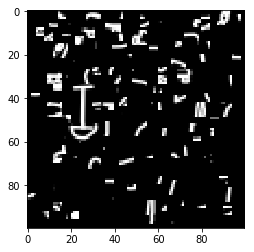

In [39]:
img = image(train_x[0])
img.show(img.grayscaled_img)
img.clean_noise()